In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# !pip install opencv-python
!pip install tensorflow 

  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/390.0 MB 7.2 MB/s eta 0:00:54
   ---------------------------------------- 2.1/390.0 MB 7.3 MB/s eta 0:00:53
   ---------------------------------------- 3.7/390.0 MB 6.6 MB/s eta 0:00:59
   ---------------------------------------- 4.7/390.0 MB 5.9 MB/s eta 0:01:05
    --------------------------------------- 5.2/390.0 MB 5.5 MB/s eta 0:01:10
    --------------------------------------- 5.8/390.0 MB 5.0 MB/s eta 0:01:17
    --------------------------------------- 6.3/390.0 MB 4.6 MB/s eta 0:01:24
    --------------------------------------- 6.6/390.0 MB 4.2 MB/s eta 0:01:31
    --------------------------------------- 6.8/390.0 MB 3.9 MB/s eta 0:01:39
    --------------------------------------- 7.1/390.0 MB 3.4 MB/s eta 0:01:53
    --------------------------------------- 7.1/390.0 MB 3.4 MB/s eta

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the CSV file
data_path = 'D:/College Stuffs/Mini Project/DR/Dataset/small dataset/train.csv'  # Replace with the correct path to your CSV file
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
print(df.head())

# Define the base directory for images
base_image_dir = 'D:/College Stuffs/Mini Project/DR/Dataset/small dataset/colored_images'  # Replace with the correct path to your image base directory

# Define a mapping from directory names to labels
label_mapping = {
    'No_DR': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
    'Proliferate_DR': 4
}

# Preprocess images and labels
def preprocess_data(df, base_image_dir, label_mapping, img_size=(224, 224)):
    images = []
    labels = []

    for index, row in df.iterrows():
        for label_name, label_num in label_mapping.items():
            img_dir = os.path.join(base_image_dir, label_name)
            img_path = os.path.join(img_dir, row['id_code'] + '.png')
            if os.path.exists(img_path):
                image = cv2.imread(img_path)
                image = cv2.resize(image, img_size)
                # image = image / 255.0  # Normalize to [0, 1]
                image = image.astype(np.float32) / 255.0
                images.append(image)
                labels.append(label_num)

    images = np.array(images, dtype=np.float32)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=5)  # One-hot encode the labels (assuming 5 classes)

    return images, labels

images, labels = preprocess_data(df, base_image_dir, label_mapping)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


# **The CNN MODEL**

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))  # Add a dense layer
cnn_model.add(Dense(5, activation='softmax'))  # Output layer with 5 classes (adjust as needed)

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


c:\Users\Shashank\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'X_train' is not defined

# **Hyperparameter Tunning**

In [5]:
# Example: Modify learning rate and optimizer
from tensorflow.keras.optimizers import Adam

# Create a new CNN model (you can reuse the existing one)
cnn_model_tuned = Sequential()
cnn_model_tuned.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model_tuned.add(MaxPooling2D((2, 2)))
cnn_model_tuned.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_tuned.add(MaxPooling2D((2, 2)))
cnn_model_tuned.add(Flatten())
cnn_model_tuned.add(Dense(128, activation='relu'))  # Add a dense layer
cnn_model_tuned.add(Dense(5, activation='softmax'))  # Output layer with 5 classes (adjust as needed)

# Compile with a different learning rate and optimizer
cnn_model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the tuned CNN model
cnn_model_tuned.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6148 - loss: 1.6110 - val_accuracy: 0.7340 - val_loss: 0.7460
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7347 - loss: 0.7292 - val_accuracy: 0.7217 - val_loss: 0.7659
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7563 - loss: 0.6731 - val_accuracy: 0.7299 - val_loss: 0.7434
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.7356 - loss: 0.7074 - val_accuracy: 0.7244 - val_loss: 0.7561
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.7338 - loss: 0.6747 - val_accuracy: 0.7422 - val_loss: 0.7632
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7668 - loss: 0.6174 - val_accuracy: 0.7462 - val_loss: 0.7871
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7735 - loss: 0.5993 - val_accuracy: 0.7394 - val_loss: 0.7426
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7963 - loss: 0.5683 - val_accuracy: 0.7108 - v

# **Using Data Augmentation**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
# Define data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    shear_range=0.2,  # Random shear
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    vertical_flip=False  # No vertical flip for retinal images
)


In [8]:
datagen.fit(X_train)  # X_train: your preprocessed training images
# Example: Train your CNN model using augmented data
cnn_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.5788 - loss: 1.1913 - val_accuracy: 0.7299 - val_loss: 0.7908
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.6902 - loss: 0.8775 - val_accuracy: 0.7340 - val_loss: 0.7987
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.6975 - loss: 0.8551 - val_accuracy: 0.7271 - val_loss: 0.8113
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7219 - loss: 0.7886 - val_accuracy: 0.7381 - val_loss: 0.8151
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7166 - loss: 0.7969 - val_accuracy: 0.7312 - val_loss: 0.8168
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7014 - loss: 0.8227 - val_accuracy: 0.7367 - val_loss: 0.8382
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7054 - loss: 0.8055 - val_accuracy: 0.7312 - val_loss: 0.8103
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7106 - loss: 0.7777 - val_accuracy: 0.7381 - val_loss: 0.

# **Using Transfer learning**

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features from your images using VGG16
features_train = base_model.predict(X_train)
features_val = base_model.predict(X_val)

# Create an ANN model on top of VGG16 features
ann_on_vgg = Sequential()
ann_on_vgg.add(Flatten(input_shape=features_train.shape[1:]))
ann_on_vgg.add(Dense(128, activation='relu'))
ann_on_vgg.add(Dense(5, activation='softmax'))  # Assuming 5 classes

# Compile the model
ann_on_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_on_vgg.fit(features_train, y_train, epochs=10, validation_data=(features_val, y_val))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 714s 8s/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 178s 8s/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6288 - loss: 1.5280 - val_accuracy: 0.7176 - val_loss: 0.8165
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7408 - loss: 0.7229 - val_accuracy: 0.7312 - val_loss: 0.8014
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7342 - loss: 0.7045 - val_accuracy: 0.7490 - val_loss: 0.6865
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7617 - loss: 0.6499 - val_accuracy: 0.7572 - val_loss: 0.7122
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7751 - loss: 0.6072 - val_accuracy: 0.7462 - val_loss: 0.7927
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7716 - loss: 0.5979 - val_accuracy: 0.7312 - val_loss: 0.8566
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7830 - loss: 0.5626 - val_accuracy: 0.7490 - val_loss: 0.7056
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7923 - loss: 0.5150 - val_accuracy: 0.7626 - v

# **The ANN Model**

In [10]:
# Create the ANN model
ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', input_shape=(cnn_model.output_shape[1],)))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(5, activation='softmax'))  # Assuming 5 classes

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model using CNN features
ann_model.fit(cnn_model.predict(X_train), y_train, epochs=10, validation_data=(cnn_model.predict(X_val), y_val))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 481ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/step
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5385 - loss: 1.3260 - val_accuracy: 0.7299 - val_loss: 0.8142
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7143 - loss: 0.8119 - val_accuracy: 0.7299 - val_loss: 0.7942
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7189 - loss: 0.7752 - val_accuracy: 0.7271 - val_loss: 0.7856
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7263 - loss: 0.7811 - val_accuracy: 0.7312 - val_loss: 0.7895
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7341 - loss: 0.7363 - val_accuracy: 0.7326 - val_loss: 0.7826
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.7449 - val_accuracy: 0.7312 - val_loss: 0.7797
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7446 - loss: 0.7099 - val_accuracy: 0.7381 - val_loss: 0.7815
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━

# **Checking the predictions**

23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


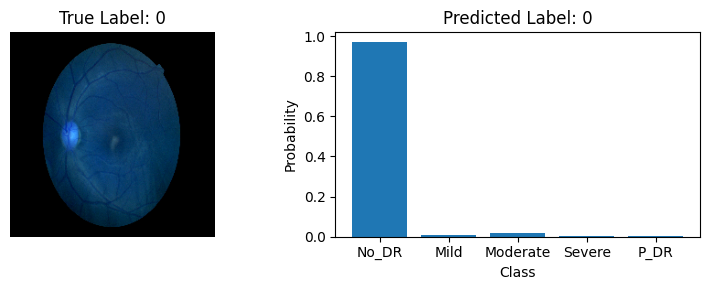

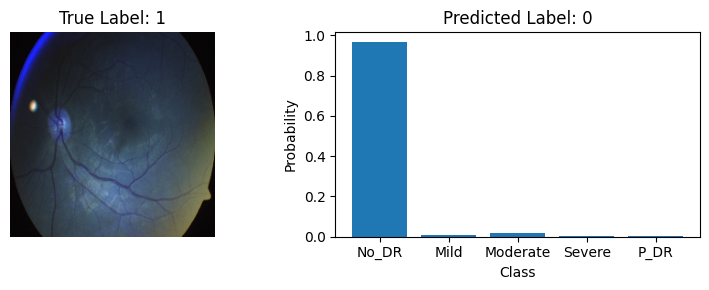

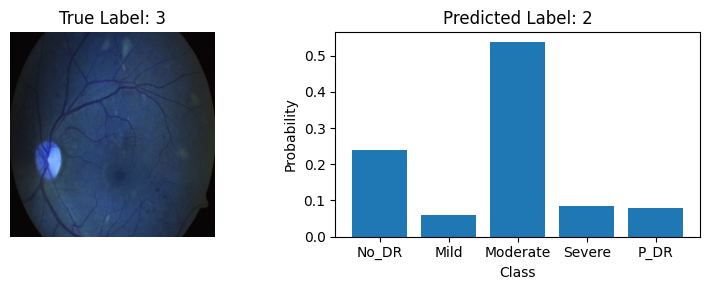

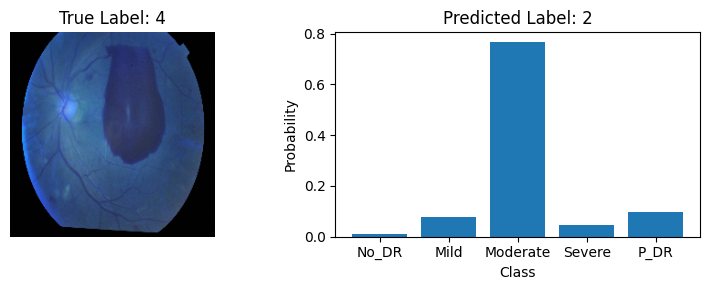

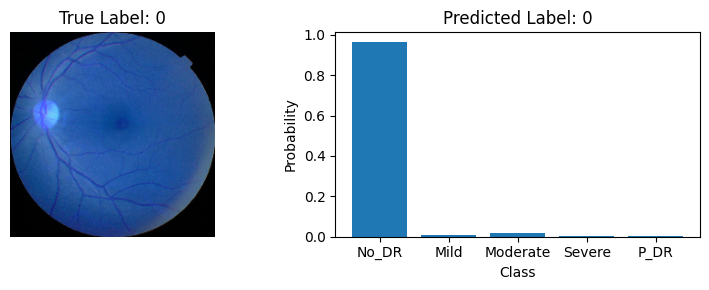

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained model (cnn_model and ann_model) already

# Get predictions for test data
cnn_predictions = cnn_model.predict(X_val)
ann_predictions = ann_model.predict(cnn_predictions)

# Convert one-hot encoded labels back to class labels
predicted_classes = np.argmax(ann_predictions, axis=1)

# Visualize a few test images along with their predicted labels
num_samples_to_visualize = 5
for i in range(num_samples_to_visualize):
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(X_val[i])
    plt.title(f"True Label: {np.argmax(y_val[i])}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(5), ann_predictions[i])
    plt.xticks(range(5), ['No_DR', 'Mild', 'Moderate', 'Severe', 'P_DR'])
    plt.title(f"Predicted Label: {predicted_classes[i]}")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.tight_layout()

    plt.show()
